# **Data Exploration**


In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics

import plotly.express as px
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import pandas as pd

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [6]:
dataset = pd.read_parquet("/content/drive/MyDrive/dataset.parquet")

In [7]:
dataset.head(10)

url  \
0  1stwebdesigner.com/free-wordpress-portfolio-pl...   
1  3boysandadog.com/14-fun-pig-craft-projects-for...   
2                      975kgkl.com/listen-live/popup   
3  9news.com/article/entertainment/music/colorado...   
4  9to5toys.com/2022/04/07/best-ios-app-deals-dea...   
5  aarp.org/retirement/social-security/questions-...   
6  adsoftheworld.com/media/print/revolution_cooki...   
7  adweek.com/performance-marketing/twitter-heres...   
8   ahfcroyals.sportngin.com/register/form/219117784   
9  airandwaterexpert.com/why-does-my-honeywell-ai...   

                                                 vec  \
0  [0.06221233308315277, -0.027142951264977455, 0...   
1  [0.053764428943395615, 0.10884478688240051, 0....   
2  [-0.43707162141799927, 0.1012381836771965, 0.4...   
3  [-0.011343298479914665, -0.29037919640541077, ...   
4  [-0.07137802243232727, 0.02366500347852707, 0....   
5  [0.17894570529460907, 0.05809243023395538, 0.5...   
6  [0.2245682030916214, 0.12662597000598907, 0.25...   
7  [0.5070443153381348, -0.04621146246790886, 0.1...   
8  [0.014649282209575176, -0.15974664688110352, 0...   
9  [0.13189011812210083, 0.20670969784259796, 0.4...   

                                            contents  
0  Top 10 Free WordPress Portfolio Plugins - 1stW...  
1  26 Fun & Easy Pig Craft Projects for Kids. Whe...  
2  KGKL 97.5 FM Country - Listen Live. Listen liv...  
3  Backstreet Boys will bring DNA World Tour back...  
4  Todays best Mac and iOS app deals: Dead Cells,...  
5  At What Age Do You File to Get the Biggest Soc...  
6  Revolution Cooking Print Advert By MMB: Toaste...  
7  Twitter: Heres How to Connect With Other Users...  
8  Welcome . WPSL Royals 2022 Player Registration...  
9  Why Does My Honeywell Air Purifier Smell? - Ai...

In [8]:
print("Number of samples:", dataset.shape[0])
print("Dimensions of embedding vectors:", len(dataset['vec'][0]))

Number of samples: 20362
Dimensions of embedding vectors: 768


## **Dimensionality Reduction with PCA**

In [9]:
embedding_matrix = np.array(dataset['vec'].tolist())

pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_matrix)

df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

fig = px.scatter(
    df_pca,
    x='PCA1',
    y='PCA2',
    title='PCA Result',
    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'}
)

fig.show()


## **Dimensionality Reduction with t-SNE**

In [10]:
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(embedding_matrix)

df_tsne = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'])

fig = px.scatter(
    df_tsne,
    x='tSNE1',
    y='tSNE2',
    title='t-SNE Result',
    labels={'tSNE1': 't-SNE Component 1', 'tSNE2': 't-SNE Component 2'}
)

fig.show()


**Observations**

*   The plot reveals the distribution of data points along the first and second
principal components. It is evident that the first principal component captures a significant amount of variance, while the second component contributes less. This suggests that the data is primarily spread out along the first principal component.
*   The PCA plot does not exhibit clear, well-defined clusters or groupings of data points. Instead, the data points are scattered continuously along the axes, indicating that traditional clustering algorithms like K-Means may not be effective in grouping the data.

*   The data points extend across a wide range along the first principal component, suggesting a continuous distribution of data rather than distinct clusters.





# **Clustering**

## **Algorithm Selection**

### **1. K-Means Algorithm**

### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

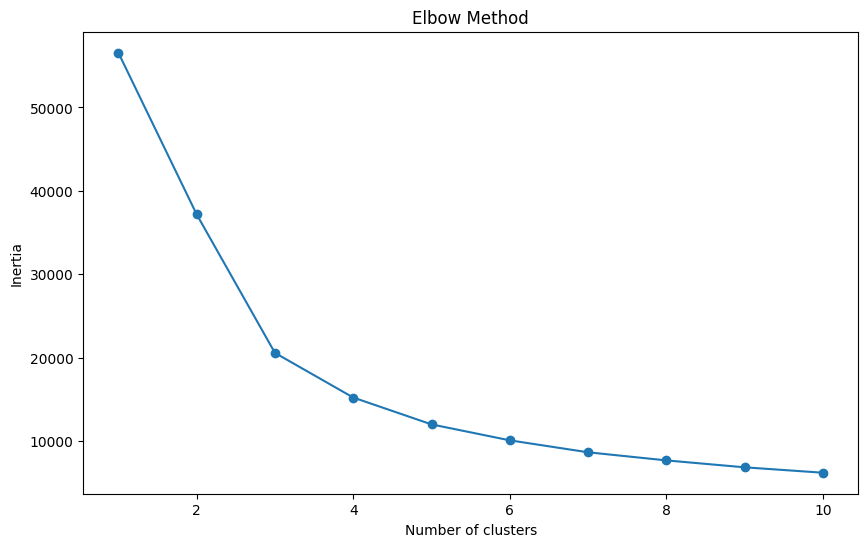

In [11]:
X = pd.DataFrame(dataset['vec'].tolist())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42).fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Training**

In [12]:
embedding_vectors = np.stack(dataset['vec'].values)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(embedding_vectors)

cluster_centers = kmeans.cluster_centers_

labels = kmeans.labels_

# data['cluster_label'] = labels
# data.to_csv('clustered_data.csv')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Visualization (PCA)**

In [13]:
vectors = np.array(dataset['vec'].tolist())

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)


centroids = pca.transform(kmeans.cluster_centers_)
df = pd.DataFrame(reduced_vectors, columns=['PCA1', 'PCA2'])
df['Cluster'] = labels


data_points = go.Scatter(
    x=df['PCA1'],
    y=df['PCA2'],
    mode='markers',
    marker=dict(color=df['Cluster'], size=10, colorscale='Viridis', line=dict(width=1, color='black')),
    name='Data Points'
)

centroids_plot = go.Scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    mode='markers',
    marker=dict(color='red', size=14, symbol='x'),
    name='Centroids'
)

fig = go.Figure(data=[data_points, centroids_plot])

fig.update_layout(
    title='K-Means Clustering with PCA-reduced Data',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2'
)

fig.show()


**Visualization (t-SNE)**

In [14]:
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors = tsne.fit_transform(vectors)

centroids = pca.transform(kmeans.cluster_centers_)
df = pd.DataFrame(reduced_vectors, columns=['PCA1', 'PCA2'])
df['Cluster'] = labels


data_points = go.Scatter(
    x=df['PCA1'],
    y=df['PCA2'],
    mode='markers',
    marker=dict(color=df['Cluster'], size=10, colorscale='Viridis', line=dict(width=1, color='black')),
    name='Data Points'
)

centroids_plot = go.Scatter(
    x=centroids[:, 0],
    y=centroids[:, 1],
    mode='markers',
    marker=dict(color='red', size=14, symbol='x'),
    name='Centroids'
)

fig = go.Figure(data=[data_points, centroids_plot])

fig.update_layout(
    title='K-Means Clustering with t-SNE-reduced Data',
    xaxis_title='t-SNE Component 1',
    yaxis_title='t-SNE Component 2'
)

fig.show()

### **2. DBSCAN Algorithm**

**Optimal eps**

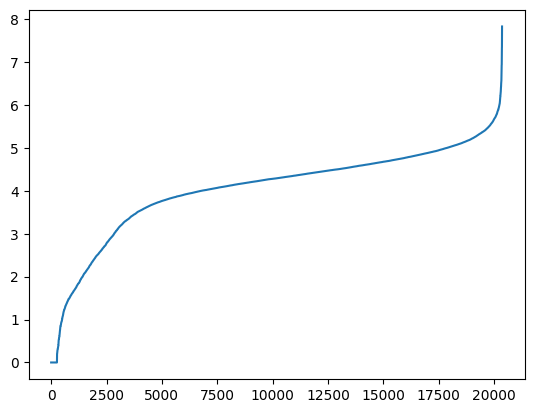

In [15]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(vectors)
distances, indices = neighbors_fit.kneighbors(vectors)

# Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

**Training**

In [16]:
db = DBSCAN(eps=5.8, min_samples=10).fit(vectors)

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

if n_clusters_ > 1:
    silhouette_score = metrics.silhouette_score(vectors, labels)
    print('Silhouette Coefficient: %0.3f' % silhouette_score)
else:
    print('Silhouette Score cannot be computed for a single cluster.')

Estimated number of clusters: 1
Estimated number of noise points: 291
Silhouette Score cannot be computed for a single cluster.


**Visualization (PCA)**

In [17]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

df_pca_dbscan = pd.DataFrame(reduced_vectors, columns=['PCA1', 'PCA2'])
df_pca_dbscan['Cluster'] = labels


data = []
unique_labels = set(labels)
colors = [c for c in px.colors.qualitative.Plotly]

for k, col in zip(unique_labels, colors):
    cluster_data = df_pca_dbscan[df_pca_dbscan['Cluster'] == k]
    scatter = go.Scatter(
        x=cluster_data['PCA1'],
        y=cluster_data['PCA2'],
        mode='markers',
        marker=dict(color=col, size=10),
        name=f'Cluster {k}'
    )
    data.append(scatter)


fig = go.Figure(data=data)
fig.update_layout(
    title='DBSCAN Clustering with PCA-reduced Data',
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2'
)

fig.show()


**Visualization (t-SNE)**

In [18]:
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors = tsne.fit_transform(vectors)

df_tsne_dbscan = pd.DataFrame(reduced_vectors, columns=['tSNE1', 'tSNE2'])
df_tsne_dbscan['Cluster'] = labels

data = []
unique_labels = set(labels)
colors = [c for c in px.colors.qualitative.Plotly]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'rgba(0, 0, 0, 1)'

    cluster_data = df_tsne_dbscan[df_tsne_dbscan['Cluster'] == k]
    scatter = go.Scatter(
        x=cluster_data['tSNE1'],
        y=cluster_data['tSNE2'],
        mode='markers',
        marker=dict(color=col, size=10),
        name=f'Cluster {k}'
    )
    data.append(scatter)

fig = go.Figure(data=data)
fig.update_layout(
    title='DBSCAN Clustering with t-SNE-reduced Data',
    xaxis_title='t-SNE Component 1',
    yaxis_title='t-SNE Component 2'
)

fig.show()

## **3. HDBSCAN Algorithm**

In [19]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039293 sha256=fb9f4c4ffb6029d269730f60d0d6fce873e76332fde6faa6a1f7f6acb0b59083
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [20]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(vectors)

**Visualization(PCA)**

In [21]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

df_pca_hdbscan = pd.DataFrame(reduced_vectors, columns=['PCA1', 'PCA2'])
df_pca_hdbscan['Cluster'] = cluster_labels


scatter = go.Scatter(
    x=df_pca_hdbscan['PCA1'],
    y=df_pca_hdbscan['PCA2'],
    mode='markers',
    marker=dict(color=df_pca_hdbscan['Cluster'], size=10, colorscale='Viridis', line=dict(width=1, color='black')),
    showlegend=False
)

fig = go.Figure(data=[scatter])
fig.update_layout(
    title='HDBSCAN Clustering with PCA-reduced Data',
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2'
)


fig.show()

n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)



Estimated number of clusters: 4
Estimated number of noise points: 10257


**Visualization (t-SNE)**

In [22]:
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors = tsne.fit_transform(vectors)

df_pca_hdbscan = pd.DataFrame(reduced_vectors, columns=['PCA1', 'PCA2'])
df_pca_hdbscan['Cluster'] = cluster_labels


scatter = go.Scatter(
    x=df_pca_hdbscan['PCA1'],
    y=df_pca_hdbscan['PCA2'],
    mode='markers',
    marker=dict(color=df_pca_hdbscan['Cluster'], size=10, colorscale='Viridis', line=dict(width=1, color='black')),
    showlegend=False
)

fig = go.Figure(data=[scatter])
fig.update_layout(
    title='HDBSCAN Clustering with PCA-reduced Data',
    xaxis_title='PCA Component 1',
    yaxis_title='PCA Component 2'
)

fig.show()

n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 4
Estimated number of noise points: 10257


# **Performance Analysis and Conclusion**

Based on above reults and plots:


1. **K-Means Clustering**: The data points are divided into three distinct groups with clear centroids. This suggests that if the data has a structure where clusters are compact and well-separated, K-Means has performed effectively.

2. **DBSCAN Clustering**: This method identified one main cluster and a number of outliers. DBSCAN's performance suggests that there may be dense regions of data points with some noise or less dense points around them. If these outliers are genuine and not noise, DBSCAN may not be capturing the underlying structure of the data effectively.

3. **HDBSCAN Clustering**: It seems to have identified a density-based clustering structure without segregating too many outliers. This might indicate that if the data has clusters of varying density, HDBSCAN is capturing this well.

**Conclusions**:
- If the supplementary data confirms that the clusters have a non-spherical shape or vary significantly in size and density, then HDBSCAN's approach would be validated.
- If the supplementary data reveals that the outliers identified by DBSCAN are indeed not part of the main cluster, then DBSCAN is effectively distinguishing noise from the cluster.
- Conversely, if the supplementary data shows that K-Means' clusters correspond to distinct categories within the data, then K-Means' simplicity would be its strength.


# **Future Scope**



*   **Feature Extraction**: Both GPT and BERT have strong capabilities for feature
extraction, especially from text data. You can use these models to generate embeddings that capture the semantic relationships within your data. These embeddings can then be used as input features for clustering algorithms, potentially revealing more nuanced cluster
- **Tune Parameters**: Experiment with different parameters for DBSCAN (epsilon and min_samples) and HDBSCAN (min_cluster_size, min_samples) to see if the clustering performance can be improved.
- **Feature Analysis**: Dive deeper into the features that are driving the clustering. This could involve analyzing which features have the most influence on the clustering outcome and if any feature engineering could improve the results.
- **Dimensionality Reduction**: Try other dimensionality reduction techniques beyond PCA to see if they reveal different structures within the data that could influence the clustering results.
- **Use Ensemble Methods**: Implement ensemble clustering techniques that combine multiple clustering algorithms to form a consensus clustering. This could mitigate the weaknesses of individual algorithms.
- **Domain-Specific Insights**: Consult with domain experts to interpret the clusters and understand their significance in the context of the data. This could provide insights into whether the clusters make sense from a practical standpoint.
- **Predictive Modeling**: If the clustering is a preliminary step for further analysis, such as classification, then the next step would be to use the clusters as features in a predictive model and assess whether they improve model performance.
- **Scalability and Efficiency**: If the dataset is large, investigate the scalability of the chosen algorithm and optimize it for efficiency.

# **References**



*   *Saji, B. (2024) Elbow method for finding the optimal number of clusters in K-means, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/#:~:text=The%20elbow%20method%20is%20a%20technique%20used%20in%20clustering%20analysis,WCSS%20starts%20to%20level%20off. (Accessed: 28 January 2024).*

* *Dorji, N. (2018) DBSCAN: Density-based Clustering Essentials, Datanovia. Available at: https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/ (Accessed: 28 January 2024).*
*   *Sklearn.cluster.HDBSCAN (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html (Accessed: 28 January 2024).*
*   *St&ouml;ckl, A. (2021) Clustering the 20 newsgroups dataset with GPT3 embeddings, Medium. Available at: https://towardsdatascience.com/clustering-the-20-newsgroups-dataset-with-gpt3-embeddings-10411a9ad150 (Accessed: 28 January 2024).*
*   *Ghantasala, P., Nayani, S.S. and Lita Doolan MRSB AMBCS Oxford Biologist Harvard Educated AI Technician (2023) How do you optimize clustering models?, How to Optimize Your Clustering Models for Data Analysis. Available at: https://www.linkedin.com/advice/3/how-do-you-optimize-clustering-models-skills-data-analysis (Accessed: 28 January 2024).*
*  *Plotly (no date) Plotly/plotly.py: The Interactive Graphing Library for Python this project now includes Plotly Express!, GitHub. Available at: https://github.com/plotly/plotly.py (Accessed: 28 January 2024).*









